# _*Customer Segmentation*_ 

#### Aim  : To cluster customers and provide an Analysis report on MRF(Monetary Value , Frequency , Recency )

In [56]:
# Importing the Libs 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## _*Data Exploration*_

In [57]:
# Importing the Data 
data  = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [58]:
data_org = data.copy()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [60]:
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [61]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<AxesSubplot:>

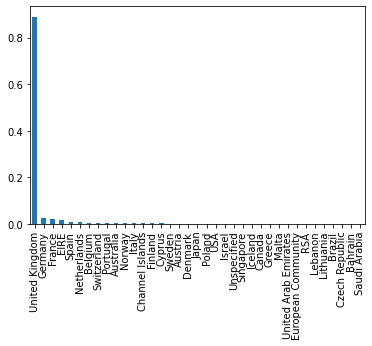

In [62]:
m = data['Country'].value_counts(normalize=True)
m.plot(kind = 'bar')

<AxesSubplot:>

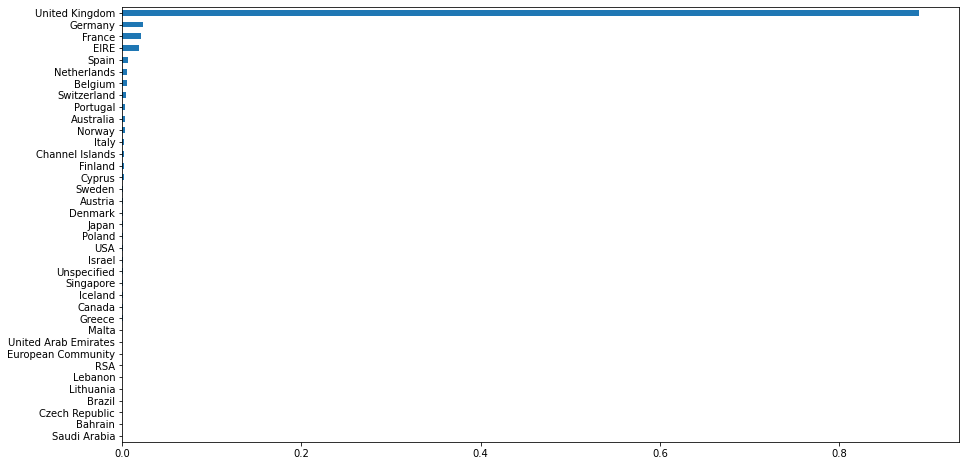

In [63]:
# Plotting without UK
plt.figure(figsize=(15,8))
m.sort_values(ascending=True).plot(kind = 'barh')

## _*Exploratory Data Analysis*_

In [64]:
m = data['Country'].value_counts(normalize=True)
m[:8]

United Kingdom    0.889509
Germany           0.023339
France            0.020871
EIRE              0.018398
Spain             0.006226
Netherlands       0.005828
Belgium           0.005086
Switzerland       0.004614
Name: Country, dtype: float64

 * Almost 90 % of the sales is from uk 

In [65]:
data_uk = data[data.Country == 'United Kingdom']
data_uk  = data_uk.reset_index()

In [66]:
data_uk = data_uk.drop('index',axis = 1)

In [67]:
data_uk.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
262201,571281,22568,FELTCRAFT CUSHION OWL,48,2011-10-16 13:23:00,3.39,14088.0,United Kingdom
77520,547374,22990,COTTON APRON PANTRY DESIGN,1,2011-03-22 13:54:00,4.95,16110.0,United Kingdom
293575,574619,21755,LOVE BUILDING BLOCK WORD,2,2011-11-06 11:18:00,6.25,15952.0,United Kingdom
20651,539098,22694,WICKER STAR,12,2010-12-16 10:28:00,2.10,14841.0,United Kingdom
97415,550144,21908,CHOCOLATE THIS WAY METAL SIGN,2,2011-04-14 14:14:00,2.10,16520.0,United Kingdom
7546,537262,22197,SMALL POPCORN HOLDER,100,2010-12-06 11:26:00,0.72,15039.0,United Kingdom
263381,571429,22791,T-LIGHT GLASS FLUTED ANTIQUE,12,2011-10-17 12:50:00,1.25,15335.0,United Kingdom
341963,579364,22633,HAND WARMER UNION JACK,10,2011-11-29 11:52:00,2.10,14173.0,United Kingdom
275468,572662,84944,SET OF 6 KASHMIR FOLKART BAUBLES,1,2011-10-25 12:54:00,1.65,15443.0,United Kingdom
267200,571841,21733,RED HANGING HEART T-LIGHT HOLDER,4,2011-10-19 12:21:00,2.95,17625.0,United Kingdom


In [68]:
import datetime

In [69]:
# Creating MRF Table Strategy
df_s = data_uk.sample(10000, random_state=42)
df_s["InvoiceDate"] = df_s["InvoiceDate"].dt.date
df_s["TotalSum"] = df_s["Quantity"] * df_s["UnitPrice"]
snapshot_date = max(df_s.InvoiceDate) + datetime.timedelta(days=1)
customers = df_s.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                            'InvoiceNo': 'count','TotalSum': 'sum'})
customers.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747.0,199,2,115.00
12748.0,2,132,863.85
12749.0,23,4,48.00
12820.0,45,1,15.00
12822.0,88,2,23.96


In [70]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2529 entries, 12747.0 to 18287.0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        2529 non-null   int64  
 1   Frequency      2529 non-null   int64  
 2   MonetaryValue  2529 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 79.0 KB


In [71]:
customers.describe()

,Recency,Frequency,MonetaryValue
count,2529.000000,2529.000000,2529.000000
mean,107.791222,3.954132,71.763903
std,103.831948,7.193546,199.813994
min,1.000000,1.000000,-705.450000
25%,25.000000,1.000000,14.850000
50%,66.000000,2.000000,29.900000
75%,176.000000,4.000000,70.110000
max,374.000000,192.000000,4962.290000


In [74]:
import warnings 
warnings.filterwarnings('ignore')

                                   RMF Variables Distribution                                   


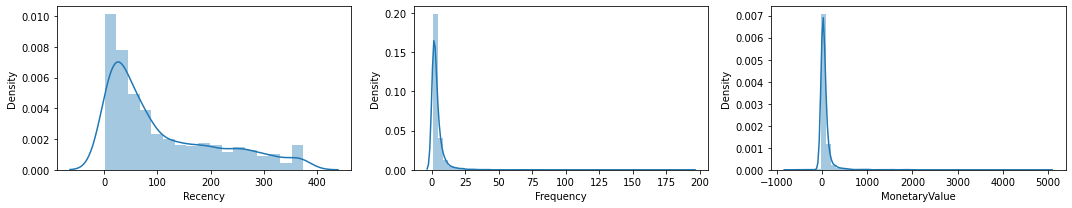

In [75]:
import math
print('\033[1mRMF Variables Distribution'.center(100))

n=3
nf = [i for i in customers.columns]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(customers[nf[c]])
plt.tight_layout()
plt.show()

## _*Data Preprocessing*_

In [76]:
from scipy import stats
from scipy.stats import randint
from scipy.stats import loguniform

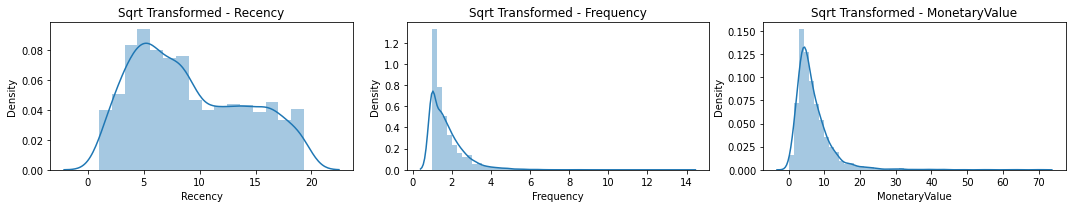

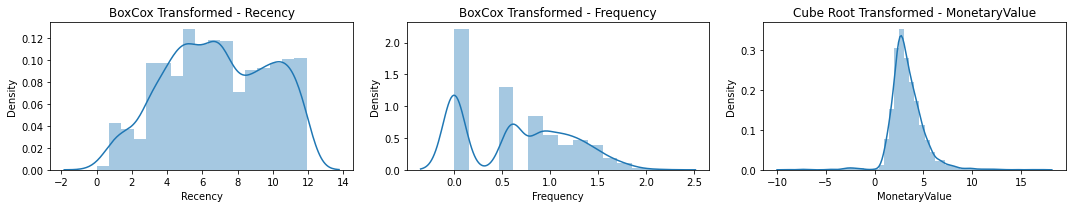

In [78]:
cutomers_logT = customers.copy(deep=True)
cutomers_sqrtT = customers.copy(deep=True)
cutomers_cbrtT = customers.copy(deep=True)
cutomers_bxcxT = customers.copy(deep=True)

for i in customers.columns:
    cutomers_sqrtT[i] = np.sqrt(customers[i])
    cutomers_cbrtT[i] = np.cbrt(customers[i])
    if i != 'MonetaryValue':
        cutomers_bxcxT[i] = stats.boxcox(customers[i])[0]

# plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
# for c in range(len(nf)):
#     plt.subplot(math.ceil(len(nf)/n),n,c+1)
#     sns.distplot(cutomers_logT[nf[c]])
#     plt.title('Log Transformed - {}'.format(nf[c]))
# plt.tight_layout()
# plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(cutomers_sqrtT[nf[c]])
    plt.title('Sqrt Transformed - {}'.format(nf[c]))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)-1):
    plt.subplot(1,3,c+1)
    sns.distplot(cutomers_bxcxT[nf[c]])
    plt.title('BoxCox Transformed - {}'.format(nf[c]))
plt.subplot(1,3,3)
sns.distplot(cutomers_cbrtT[nf[2]])
plt.title('Cube Root Transformed - {}'.format(nf[2]))
plt.tight_layout()
plt.show()


In [79]:
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2524,7.024775,1.059140,3.949789
2525,10.761381,0.000000,2.705339
2526,1.238239,1.343582,5.522006
2527,2.974410,1.744363,4.059729
2528,5.773333,0.000000,1.909281


In [80]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(customers_fix)
customer_normalized = ss.transform(customers_fix)
customer_normalized

array([[ 1.00642656, -0.10977414,  0.86972183],
       [-2.08074181,  2.61181446,  3.54353134],
       [-0.81579246,  0.70826401,  0.16485584],
       ...,
       [-1.91365185,  1.21934574,  1.24780341],
       [-1.32299539,  1.93946253,  0.40894386],
       [-0.37078322, -1.19478528, -0.82469667]])

## *_Predictive Modeling_*

### Kmeans

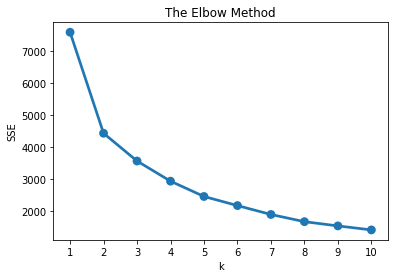

In [81]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

#Elbow Plot    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


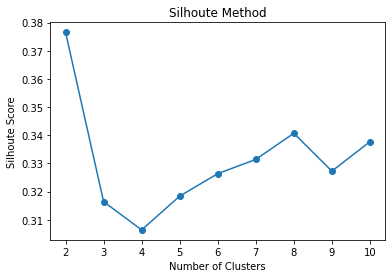

In [84]:
from sklearn.metrics import silhouette_score as sscore 

list_num_clusters = list(range(2,11))
silhoute_score = []
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(customer_normalized)
    a =sscore(customer_normalized,km.labels_,metric='euclidean')
    silhoute_score.append(a)
plt.plot(list_num_clusters,silhoute_score)
plt.scatter(list_num_clusters,silhoute_score)
plt.title('Silhoute Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoute Score');

* From both Kmeans and Silhouette method we can see we require 3 clusters 

In [85]:
km  = KMeans(n_clusters=3)
prediction  = km.fit_predict(customer_normalized)

In [93]:
customers['cluster'] = prediction

In [94]:
customers

,Recency,Frequency,MonetaryValue,cluster
CustomerID,,,,
12747.0,199,2,115.00,1
12748.0,2,132,863.85,2
12749.0,23,4,48.00,2
12820.0,45,1,15.00,0
12822.0,88,2,23.96,0
...,...,...,...,...
18265.0,73,4,61.62,2
18270.0,267,1,19.80,1
18272.0,3,7,168.38,2


### DBSCAN

In [102]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
pred_DB = db.fit_predict(customer_normalized)

In [103]:
db.labels_

array([ 0, -1,  1, ...,  1,  1,  2], dtype=int64)

### Hierachial Agglomerative Clustering 

In [105]:
from sklearn.cluster import AgglomerativeClustering
hag = AgglomerativeClustering(n_clusters=3)
pred_hag = hag.fit_predict(customer_normalized)

## *_End Report_*

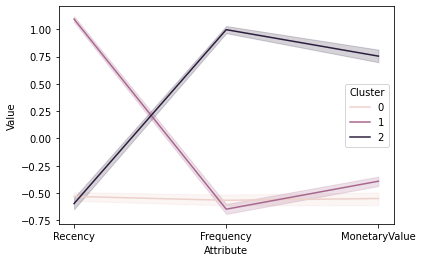

In [98]:
## Kmeans Report
df_normalized = pd.DataFrame(customer_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = km.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()

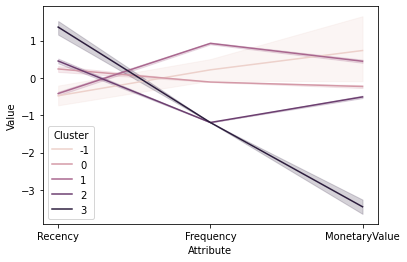

In [104]:
### DBSCAN Report
df_normalized = pd.DataFrame(customer_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = db.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()

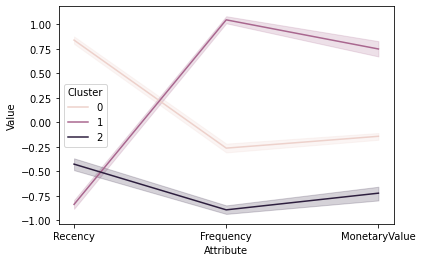

In [106]:
df_normalized = pd.DataFrame(customer_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = hag.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()

## _*Conclusion*_ 

* Customers can be  grouped into three clusters or four Clusters  

* From Kmeans Clusstering it can be seen customers with low recency and high frequency have more monitary value to the company than customers with high recency and low frequency 

* From DBSCAN no meaningful conclusion can be taken 

* From HAG it can be confirmed that customers with low recency and high frequency have the highest monitary value. 